INTRODUCTION

The Outpatient provider is a dataset that represent Outpatient providers

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import ipywidgets
import matplotlib.pyplot as plt
import qgrid

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

conn = sqlite3.connect('Outpatient_provdr.db') # Create SQL Database name 'Outpatient_provdr'
Outpatient_provdr = pd.read_csv('Outpatient_provdr.csv') # Read the CSV file
Outpatient_provdr.to_sql('Outpatient_provdr', conn, if_exists = 'replace') #Populate the database with the CSV
qgrid_widget = qgrid.show_grid(Outpatient_provdr)

In [2]:
Outpatient_provdr

,APC,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Outpatient_Services,Average_Estimated_Submitted_Charges,Average_Total_Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091
5,0012 - Level I Debridement & Destruction,40016,UAMS MEDICAL CENTER,4301 WEST MARKHAM STREET MAIL SLOT 612,LITTLE ROCK,AR,72205,AR - Little Rock,3166,58.954668,13.573774
6,0012 - Level I Debridement & Destruction,40017,NORTH ARKANSAS REGIONAL MEDICAL CENTER,620 NORTH MAIN STREET,HARRISON,AR,72601,AR - Springdale,438,143.639406,28.401027
7,0012 - Level I Debridement & Destruction,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,3333 SPRINGHILL DRIVE,NORTH LITTLE RO,AR,72117,AR - Little Rock,21,115.630952,18.256667
8,0012 - Level I Debridement & Destruction,40055,SPARKS REGIONAL MEDICAL CENTER,1001 TOWSON AVENUE,FORT SMITH,AR,72901,AR - Fort Smith,41,80.102439,13.172683
9,0012 - Level I Debridement & Destruction,40118,NEA BAPTIST MEMORIAL HOSPITAL,3024 STADIUM BOULEVARD,JONESBORO,AR,72401,AR - Jonesboro,12,16.993333,12.646667


Data Inspection

In [3]:
top_of = list(Outpatient_provdr) 
print('The names of the cloumns are: \t') 
count = 1 
for top in top_of: 
    print('\n {}. {}' .format(count, top)) 
    count += 1

The names of the cloumns are: 	

 1. APC

 2. Provider_Id

 3. Provider_Name

 4. Provider_Street_Address

 5. Provider_City

 6. Provider_State

 7. Provider_Zip_Code

 8. Hospital_Referral_Region_Description

 9. Outpatient_Services

 10. Average_Estimated_Submitted_Charges

 11. Average_Total_Payments


In [27]:
rows = len(Outpatient_provdr)
print("There are {} rows, and therefore there are that many potential Patient".format(rows))

There are 43372 rows, and therefore there are that many potential Patient


In [5]:
#Sets the index to all entries where target_class > 1 = True
not_interference = Outpatient_provdr[Outpatient_provdr['Average_Total_Payments'] > 0]

#Display just the first five entries
not_interference.head()    

,APC,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Outpatient_Services,Average_Estimated_Submitted_Charges,Average_Total_Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


According to the dataset documentation, there are 43372 'positive examples' (Outpatient); let's confirm that this is true:

In [6]:
print(len(not_interference))

43372


In [7]:
outp_srvs = not_interference['Outpatient_Services']
outp_srvs

0          23
1         994
2        1765
3          20
4          22
         ... 
43367    2852
43368     912
43369     188
43370    1554
43371    1141
Name: Outpatient_Services, Length: 43372, dtype: int64

In [8]:
## Retrieve the minimum and maximum values 
## of the integrated profiles of noise using SQL query
spread_of_noise = pd.read_sql_query("""
SELECT MIN(Provider_Id), 
MAX(Provider_Id)
FROM Outpatient_provdr;
--WHERE Provider_Id = 0;
""", conn)

spread_of_noise

,MIN(Provider_Id),MAX(Provider_Id)
0,10001,670061


In [9]:
outp_srvs.min()

11

In [10]:
outp_srvs.max()

219042

### The .corr() method creates an array of correlations between the columns

In [11]:
correlated_data = Outpatient_provdr.corr()
correlated_data

,Provider_Id,Provider_Zip_Code,Outpatient_Services,Average_Estimated_Submitted_Charges,Average_Total_Payments
Provider_Id,1.000000,-0.132199,0.011141,-0.051995,-0.024966
Provider_Zip_Code,-0.132199,1.000000,-0.013416,0.043500,0.000122
Outpatient_Services,0.011141,-0.013416,1.000000,-0.080775,-0.080738
Average_Estimated_Submitted_Charges,-0.051995,0.043500,-0.080775,1.000000,0.768358
Average_Total_Payments,-0.024966,0.000122,-0.080738,0.768358,1.000000


### Plot

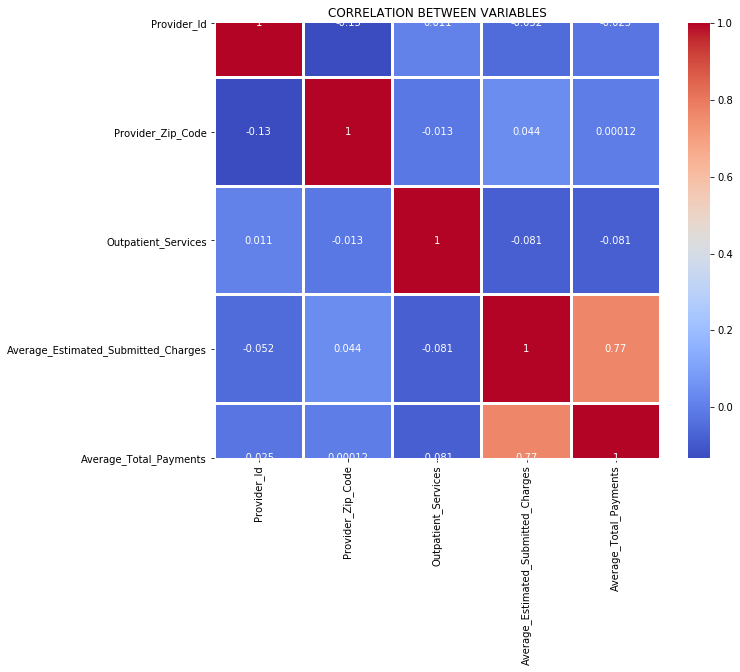

In [12]:
plt.figure(figsize=(10,8))

##annot=True means the actual correlation value will be given in each square
sns.heatmap(
    correlated_data,
    annot=True,
    cmap='coolwarm',
    linewidth=2)

plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

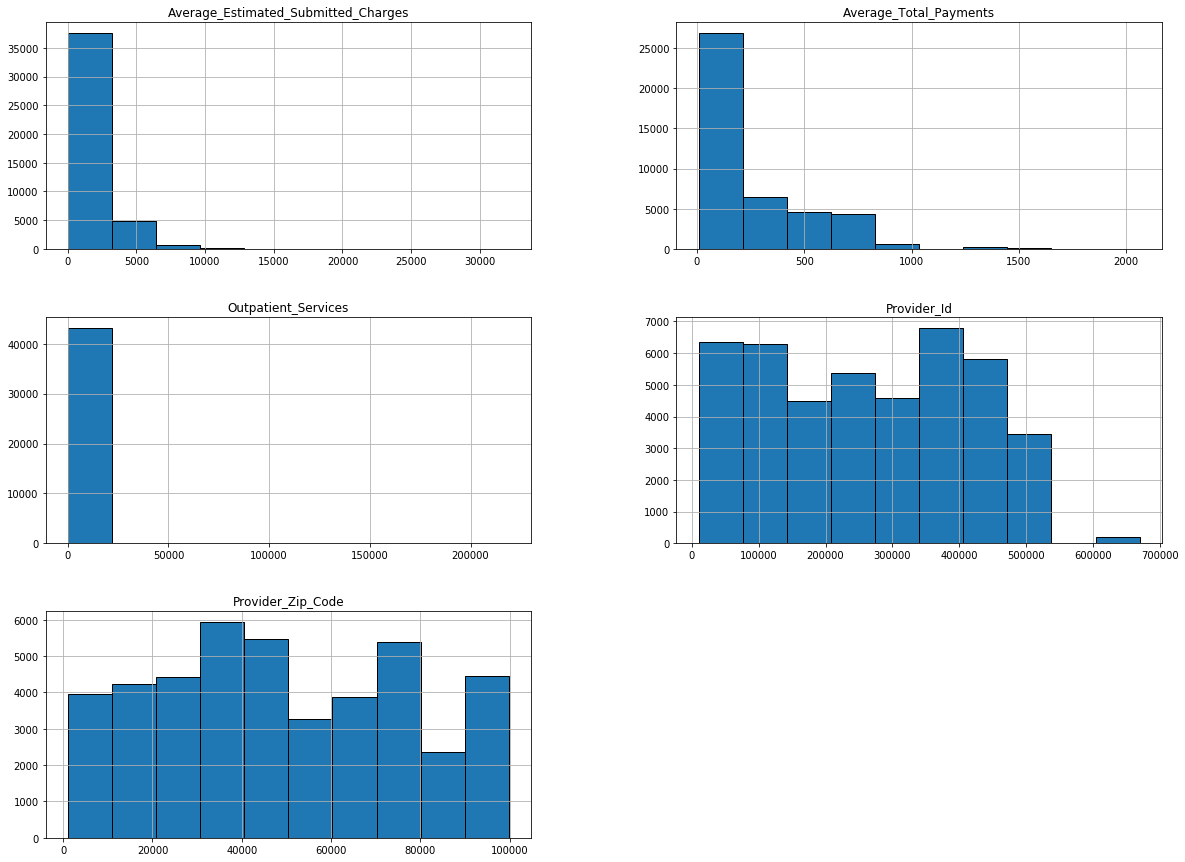

In [13]:
not_interference.hist(bins = 10, figsize=(20,15), edgecolor='black');

### Select x and y values

#### X

In [14]:
x = pd.read_sql_query("""
SELECT Outpatient_Services
FROM Outpatient_provdr
WHERE Provider_Id = 1;
""", conn)
x

,Outpatient_Services


In [15]:
#not_interference[not_interference['Provider_Id'] == 10001]
#not_interference.sort_values(by='Provider_Id')#['Provider_Id']
x = not_interference[not_interference['Provider_Id'] == 10001]['Outpatient_Services']
x

291       415
1770      394
3304       16
3749       38
4904       11
5315      126
7619      547
9639      376
11296      83
12065    3180
14067     654
16034     298
18773    1839
21771     991
24669      66
25833    1542
28688     411
31240     751
33804     256
36014    3157
38130    1919
39964     755
41521      31
Name: Outpatient_Services, dtype: int64

#### Y

In [16]:
y = not_interference[not_interference['Provider_Id'] == 10001]['Average_Total_Payments']
y

291        47.599373
1770       81.526954
3304      315.940000
3749      527.290000
4904     1300.539091
5315       88.335635
7619       95.408410
9639      152.226622
11296     219.886506
12065     456.048337
14067     703.800000
16034      56.497785
18773     137.854328
21771     362.142896
24669     506.730000
25833     312.099591
28688      53.750000
31240     684.990000
33804      47.200000
36014      67.469455
38130      89.767598
39964     115.643563
41521     148.340645
Name: Average_Total_Payments, dtype: float64

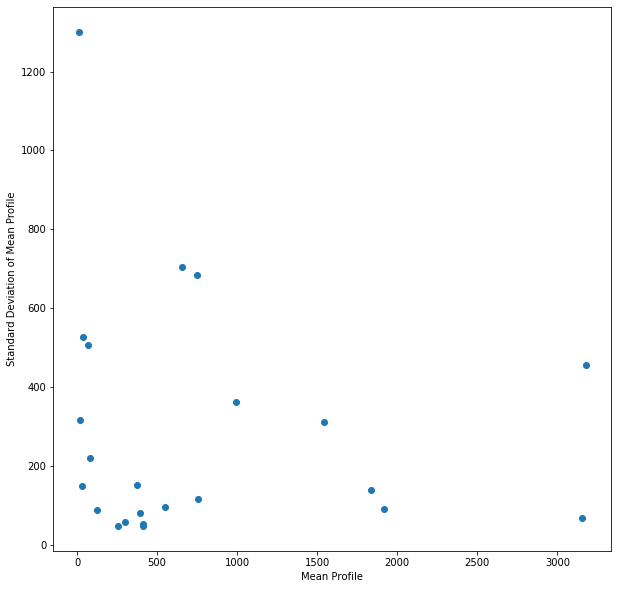

In [17]:
plt.figure(figsize = (10, 10))
plt.xlabel('Mean Profile')
plt.ylabel('Standard Deviation of Mean Profile')
plt.scatter(x,y,);

In [21]:
x

291       415
1770      394
3304       16
3749       38
4904       11
5315      126
7619      547
9639      376
11296      83
12065    3180
14067     654
16034     298
18773    1839
21771     991
24669      66
25833    1542
28688     411
31240     751
33804     256
36014    3157
38130    1919
39964     755
41521      31
Name: Outpatient_Services, dtype: int64

In [19]:
@ipywidgets.interact(color=['red','steelblue'])
def plot(color):
         return (color)
    

interactive(children=(Dropdown(description='color', options=('red', 'steelblue'), value='red'), Output()), _do…

In [20]:
sns.barplot(y='Provider_Id',
             x='Outpatient_Services',
             data=Outpatient_provdr,
             orient='h',
             color=color).set_title('Average waiting Time of Patient & Emergency in Outpatien')

NameError: name 'color' is not defined

In [24]:
qgrid_widget = qgrid.show_grid(Outpatient_provdr)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [30]:
import altair as alt

(alt.Chart(not_interference)
   .mark_rect()
   .encode(x='yearmonthdate(Provider_Name):O',
           y='Outpatient_provdr:N',
           color=alt.Color('mean(topWaitTime):Q',  
           scale=alt.Scale(scheme='orangered')))
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:                                             APC  Provider_Id  \
  0      0012 - Level I Debridement & Destruction        10029   
  1      0012 - Level I Debridement & Destruction        20024   
  2      0012 - Level I Debridement & Destruction        30064   
  3      0012 - Level I Debridement & Destruction        30088   
  4      0012 - Level I Debridement & Destruction        30111   
  ...                                         ...          ...   
  43367    0698 - Level II Eye Tests & Treatments       520098   
  43368    0698 - Level II Eye Tests & Treatments       520100   
  43369    0698 - Level II Eye Tests & Treatments       520116   
  43370    0698 - Level II Eye Tests & Treatments       520177   
  43371    0698 - Level II Eye Tests & Treatments       670034   
  
                                             Provider_Name  \
  0                    EAST ALABAMA MEDICAL CENTER AND SNF   
  1                     CENTRAL PENINSULA GENERAL HOSPITAL   
  2  

In [28]:
len(Outpatient_provdr)

43372

In [29]:
len(not_interference)

43372